**Author** : V.Joan Aléonard<br>
**Last update** :  3 May 2021<br>
**OC English path** : https://openclassrooms.com/fr/paths/167-ai-engineer#path-tabs<br>
**OC French path** : https://openclassrooms.com/fr/paths/188-ingenieur-ia#path-tabs<br>
**Title** : **Use Deep Learning to detect Bad Buzz**

![air-paradis](https://drive.google.com/uc?id=1T26mpOAUvJP700W4m8bjfYCLmDYVcyJL)

# <font color=red><center>**AIR PARADIS**</center></font>

**Air Paradis** is an airline company that wants to use AI (*Artificial Intelligence*) to **detect Bad Buzz associated with its brand** in online public tweets.

**As AI engineer for Marketing Intelligence Consulting**, we will dive into **NLP** (*Natural Language Processing*) techniques to serve Air Paradis' purpose.

Indeed, NLP allows a machine to **understand and process human language**. It will help us to solve this **text classification goal** and **detect sentiment** (positive or negative) from these tweets.

We will deploy our best **DETECT SENTIMENT solution** through <font color=salmon>**Microsoft Azure Machine Learning plateform**</font> (***MS Azure ML***).

<br>

Therefore, we will structure the project as follows:

<br>

| **Services / Tools** | **Objective** | **Available notebook** |
| :-- | :-- | :-- |
| **Google Colab and Python libraries** | Build quality of data by pre-processing the tweets text | Notebook N°1 |
| **Google Colab / MS Azure Cognitive Services API** | Use Text Analytics > Sentiment API | **<font color=green>Notebook N°2</font>** |
| **Python Script / MS Azure ML Studio > Designer** | Use "Drag-and-Drop" pipeline with no code in Azure ML Studio| Notebook N°3 |
| **Tensorflow-Keras / Google Colab PRO with GPU/TPU** | Train and evaluate advanced models | Notebook N°4 |
| **MS Azure ML Cloud > Models** | Deploy the best solution in MS Azure WebService | Notebook N°5 |

<br>

This notebook is dedicated to 2nd task : detect sentiment throuhg MS Azure Cognitive Services, and its readily available **Text Analytics / Sentiment API**.

# <font color=brown><center>**NOTEBOOK 2<br>SENTIMENT DETECTION<br>AZURE COGNITIVE SERVICES**</center></font>

![azure-cognitive-service](https://drive.google.com/uc?id=1HkJOrsXUSR4S6tBkYFSMdzg0002-OKnM)

# <font color=salmon>PART 1 - AZURE TEXT ANALYTICS: TERMS OF USE</font>

## <font color=green>P1.1 - Understand Azure</font>

<font color=green>**Azure**</font> is a **cloud computing platform** with an ever-expanding set of services to help you build solutions to meet your business goals. 

**Azure services** range from simple web services for hosting business presence in the cloud to running fully virtualized computers to run custom software solutions.

Azure provides a wealth of cloud-based services like remote storage, database hosting, and centralized account management. 

Azure also offers **new capabilities like AI** and Internet of Things (IoT).

## <font color=green>P1.2 - Understand Azure Cognitive Services</font>

<font color=green>**Azure Cognitive Services**</font> are a collection of machine learning and AI algorithms in the cloud for your development projects. They play an important role in **developing AI infused applications**.

Indeed, all it takes is an **API call** to embed the **ability to see, hear, speak, search, understand, and accelerate decision-making** into Apps, thanks to a comprehensive family of AI services and cognitive APIs.

Using the various services (Text Analytics, Speech, Computer Vision etc.), requires, at a minimum, an **access key and a service endpoint URL**. The information is required for authorization of applications that will be accessing these services.

## <font color=green>P1.3 - Understand Azure Text Analytics > Sentiment</font>

### <font color=blue>P1.3.1 - Understand the purpose</font>

The **Text Analytics API** is a cloud-based service that provides **Natural Language Processing (NLP) features** for text mining and text analysis, including: sentiment analysis, opinion mining, key phrase extraction, language detection, and named entity recognition.

**Sentiment Analysis** is used to find out what people think of our brand or topic, by mining the text for clues about positive or negative sentiment.

The feature provides different **labels**: positive, negative, neutral (sometimes, mixed), based on the highest confidence score found by the service at a sentence and/or document-level. It returns also confidence scores (between 0 and 1) for each document and sentences within it for positive, negative or neutral sentiment.

### <font color=blue>P1.3.2 - Understand the general terms of use (GTU)</font>

MS Azure Cognitive Services usually request a specific **document format** for the use its services. 

For *Text Analytics > Sentiment* API, **documents should be submitted in a JSON object** as described below:
- <code>**id**</code>: Data type is string; result is generated for each ID in the request;
- <code>**language**</code>: 2-character code; here, per default, we put *'en'* for all rows;
- <code>**text**</code>: unstructured raw text also called *document*, with a maximum size of **5,120 characters**; <code>*invalid request error*</code> will be returned if a document exceeds the maximum size.

**NOTE**<br>
We should also keep in mind that each processed document counts as a transaction.<br>The maximum number of documents that can be sent in a single request depend on the API version and feature.<br>Current API version is v3: the document limit for Sentiment Analysis is **10**; exceeding the limits will generate an HTTP 400 error code.

For further information, documentation can be found [here](https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/concepts/data-limits?tabs=version-3)

![.](https://drive.google.com/uc?id=1gDzc9sjicNHTYZvD6_fY3bx5w_HgJxoA)

### <font color=blue>P1.3.3 - Microsoft pricing</font>

Depending on the usage, we can choose the pricing that apply to our needs.

![pricing](https://drive.google.com/uc?id=1BseU_QtTdQijgvBkWACXWYrrsxSZ-YF4)

# <font color=salmon>PART 2 - PREPARE DATASET AND CREDENTIALS</font>

Before we can use the service, we need to setup all the work environment:
- Install Azure Machine Learning and AI Text Analytics via Azure ML SDK for Python;
- Load the API credentials (subscription key and endpoint) we got when we have created the resource on Azure Portal;
- Create the sample of the dataset we will use (here, we will only take 500 rows per sentiment - positive and negative);
- Create a function to call the service.

## <font color=green>P2.1 - Load libraries</font>

In [1]:
from IPython.display import clear_output

# Install library
!pip install azureml-core
!pip install azure-ai-textanalytics

clear_output()

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import json
from time import time

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set environment and tools configuration
src_folder = Path('/content/drive/MyDrive/OC_IA/P07')
pd.set_option("display.max_colwidth", 200)

## <font color=green>P2.2 - Create sample dataframe</font>

In [3]:
# Import pre-processed data
df = pd.read_csv(src_folder / 'p7_01b_final_df.csv')

# Drop useless features
df = df.drop(columns=['user', 'clean_w_count', 'noStop_tweet', 'lemma_w_count'])

# Display shape and 5 first rows
print(df.shape)
df.head()

(1559817, 4)


,sentiment,tweet,clean_tweet,lemma_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",user url w that is a bummer you should got david carr of third day to do it d,user url bummer got david carr third day
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he can not update his facebook by texting it and might cry as a result school today also,upset not update facebook texting cry result school today also
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,user i dived many times for the ball managed to save the rest go out of bounds,user dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like it is on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",user no it is not behaving at all i am mad why am i here because i can not see you all over there,user no not behaving mad not see


In [4]:
# Define the number of observation per classe (positive / negative)
N_SENTIMENT = 500 #@param ["500", "1000", "2500"] {type:"raw"}

# Create a sample of DF
sample_df = df.groupby('sentiment').apply(lambda x: x.sample(n=N_SENTIMENT,
                                                             random_state=42))
sample_df.reset_index(drop=True, inplace=True)

# Re-order columns for clarity
sample_df = sample_df[['tweet', 'clean_tweet', 'lemma_tweet', 'sentiment']]
sample_df = sample_df.rename(columns={'clean_tweet':'text_cl',
                                      'lemma_tweet':'text_lm'})

# Display DF main info
print('SAMPLE dimension: ', sample_df.shape)
print('SENTIMENT distribution: \n', sample_df.sentiment.value_counts())
sample_df.head()

SAMPLE dimension:  (1000, 4)
SENTIMENT distribution: 
 1    500
0    500
Name: sentiment, dtype: int64


,tweet,text_cl,text_lm,sentiment
0,Sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,sad gone week missing puppy tomorrow leave week,0
1,I have a sore throat,i have a sore throat,sore throat,0
2,is so extremely tired and dosent want to go to school today,is so extremely tired and dosent want to go to school today,extremely tired dosent want go school today,0
3,"@crazydiamondsi Eh up you We are talking SAAB 9-5 se, estate too. Had to get a 2.0t as insurance wouldn't touch Poppet on a 2.3t",user eh up you we are talking saab se estate too had to get a t as insurance would not touch poppet on a t,user eh talking saab se estate get insurance not touch poppet,0
4,@dougiemcfly thanks for the opinion dougie ha ha,user thanks for the opinion dougie ha ha,user thanks opinion dougie ha ha,0


In [5]:
# Save to csv file
sample_df.to_csv(src_folder / 'p7_02_sample_df.csv', index=False)

## <font color=green>P2.3 - Load API credentials</font>

Here we create a function to instantiate the <code>**TextAnalyticsClient**</code> object with the **key** and the **endpoint** saved in JSON file.

In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

# Import API credentials from JSON file
with open(src_folder / 'p7_02_credentials.json') as creds:
    credentials = json.load(creds)

# Set API variables
subscription_key = credentials['api_key']
endpoint = credentials['endpoint']

def authenticate_client():
    my_credential = AzureKeyCredential(subscription_key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint,
        credential=my_credential)
    return text_analytics_client

# Create a new client
client = authenticate_client()

## <font color=green>P2.4 - Create function to call the service</font>

Then we create a function as workaround to GTU limitations.

In [7]:
# Function to process sentiment detection
def sentiment_analysis(client, doc):
    documents = [doc]
    response = client.analyze_sentiment(documents=documents)[0]
    for idx, sentence in enumerate(response.sentences):
        return sentence.sentiment

Now that we have prepared all the environment requirements, we will do the following study in parts 3, 4 and 5, respectively:


1.   Test the service **with non-processed tweets**;
2.   Test the service **with cleaned tweets**;
3.   Test the service **lemmatized tweets (stopwords excluded)**;

# <font color=salmon>PART 3 - DETECT SENTIMENT WITH TWEETS WITHOUT PRE-PROCESSING</font>

In this part, we will try to use the service with the tweets **without any preprocessing**.

Indeed, there is no mention anywhere that the API can or cannot take raw text in charge.

The best way to know is to test !

## <font color=green>P3.1 - Process sentiment detection</font>

In [8]:
data = pd.DataFrame(columns=['text', 'label', 'prediction'])

# Process prediction
start = time()
for index, row in sample_df.iterrows():
    data = data.append({'text': row['tweet'],
                        'label': row['sentiment'],
                        'prediction': sentiment_analysis(client, row['tweet'])},
                       ignore_index=True)
pred_time = (time()-start)

# Display 5 first rows
data.head()

,text,label,prediction
0,Sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,0,negative
1,I have a sore throat,0,negative
2,is so extremely tired and dosent want to go to school today,0,negative
3,"@crazydiamondsi Eh up you We are talking SAAB 9-5 se, estate too. Had to get a 2.0t as insurance wouldn't touch Poppet on a 2.3t",0,neutral
4,@dougiemcfly thanks for the opinion dougie ha ha,0,positive


In [9]:
# Save to CSV file
data.to_csv(src_folder / 'p7_02_api_original_tweet.csv')

## <font color=green>P3.2 - Exclude neutral predictions</font>

In [10]:
# Filter on binary polarity (negative, positive)
data = data[data.prediction != 'neutral']

# Replace value of predictions columns
data['prediction'] = data['prediction'].replace(['negative', 'positive'],[0,1])

print('Nb rows: ', len(data))
print('Proportion vs Total sample: {}%'.format(len(data)/len(sample_df)*100))

# Display 5 first rows
data.head()

Nb rows:  628
Proportion vs Total sample: 62.8%


,text,label,prediction
0,Sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,0,0
1,I have a sore throat,0,0
2,is so extremely tired and dosent want to go to school today,0,0
4,@dougiemcfly thanks for the opinion dougie ha ha,0,1
5,@dullyM i would but Ive got a little one who is cheese challenged.. it makes dinners difficult when most of us live off cheese...,0,0


## <font color=green>P3.3 - Evaluate predictions</font>

In [11]:
y_test = data.label.astype(int)
y_pred = data.prediction

# Create a list to store scores/results
scores_model = []

# auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_score = auc(fpr, tpr)
# accuracy: (tp + tn) / (p + n)
acc = accuracy_score(y_test, y_pred)

# Append scores/results
scores_model.append({'Model': 'Original tweets',
                     'Predict_time':'{:0.1f}'.format(pred_time),
                     'AUC_Score':'{:0.3f}%'.format(auc_score*100),
                     'Accuracy':'{:0.3f}%'.format(acc*100)})

# Save in DF
model_results = pd.DataFrame.from_records(scores_model)
model_results

,Model,Predict_time,AUC_Score,Accuracy
0,Original tweets,212.5,71.081%,70.860%


In [12]:
# Save to CSV file
model_results.to_csv(src_folder / 'p7_02_model_results.csv')

## <font color=green>P3.4 - Plot confusion matrix</font>

In [13]:
# Create confusion matrix table
# normalize='all', 'index' or 'columns'
cm = pd.crosstab(index=y_test,
                 columns=y_pred,
                 values=y_test,
                 aggfunc=lambda x:len(x), normalize='index').mul(100)

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       327
           1       0.67      0.76      0.72       301

    accuracy                           0.71       628
   macro avg       0.71      0.71      0.71       628
weighted avg       0.71      0.71      0.71       628



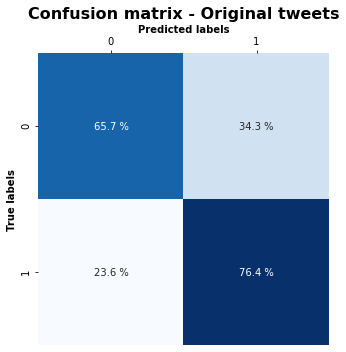

In [14]:
# Create classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Set variables
title = 'Confusion matrix - Original tweets'

# Plot the figure
fig, ax0 = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='.1f', cbar=False, cmap='Blues')
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.ylabel('True labels', fontweight='bold')
plt.xlabel('Predicted labels', fontweight='bold')
plt.title(title, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# <font color=salmon>PART 4 - DETECT SENTIMENT WITH CLEANED TWEETS</font>

In this part, we will use the **cleaned tweets**.

As a remainder, cleaned tweets were pre-processed this way:
- lowercasing of the text;
- removal of tweet specificity (user mention, hashtag, escaped characters,...);
- replacement of English word contraction;
- removal of punctuations, numbers special characters.

## <font color=green>P4.1 - Process sentiment detection</font>

In [15]:
data = pd.DataFrame(columns=['text', 'label', 'prediction'])

# Process prediction
start = time()
for index, row in sample_df.iterrows():
    data = data.append({'text': row['text_cl'],
                        'label': row['sentiment'],
                        'prediction': sentiment_analysis(client, row['text_cl'])},
                       ignore_index=True)
pred_time = (time()-start)

# Display 5 first rows
data.head()

,text,label,prediction
0,sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,0,negative
1,i have a sore throat,0,negative
2,is so extremely tired and dosent want to go to school today,0,negative
3,user eh up you we are talking saab se estate too had to get a t as insurance would not touch poppet on a t,0,negative
4,user thanks for the opinion dougie ha ha,0,positive


In [16]:
# Save to CSV file
data.to_csv(src_folder / 'p7_02_api_clean_tweet.csv')

## <font color=green>P4.2 - Exclude neutral predictions</font>

In [17]:
# Filter on binary polarity (negative, positive)
data = data[data.prediction != 'neutral']

# Replace value of predictions columns
data['prediction'] = data['prediction'].replace(['negative', 'positive'],[0,1])

print('Nb rows: ', len(data))
print('Proportion vs Total sample: {}%'.format(len(data)/len(sample_df)*100))

# Display 5 first rows
data.head()

Nb rows:  675
Proportion vs Total sample: 67.5%


,text,label,prediction
0,sad that i have been gone for a week missing my puppy and tomorrow i have to leave again for a week,0,0
1,i have a sore throat,0,0
2,is so extremely tired and dosent want to go to school today,0,0
3,user eh up you we are talking saab se estate too had to get a t as insurance would not touch poppet on a t,0,0
4,user thanks for the opinion dougie ha ha,0,1


## <font color=green>P4.3 - Evaluate predictions</font>

In [18]:
y_test = data.label.astype(int)
y_pred = data.prediction

# auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_score = auc(fpr, tpr)
# accuracy: (tp + tn) / (p + n)
acc = accuracy_score(y_test, y_pred)

# Append scores/results
# Append scores/results
model_results = model_results.append({'Model': 'Cleaned tweets',
                                      'Predict_time':'{:0.1f}'.format(pred_time),
                                      'AUC_Score':'{:0.3f}%'.format(auc_score*100),
                                      'Accuracy':'{:0.3f}%'.format(acc*100)},
                                     ignore_index=True)
model_results
model_results

,Model,Predict_time,AUC_Score,Accuracy
0,Original tweets,212.5,71.081%,70.860%
1,Cleaned tweets,197.2,76.187%,76.148%


In [19]:
# Save to CSV file
model_results.to_csv(src_folder / 'p7_02_model_results.csv')

## <font color=green>P4.4 - Plot confusion matrix</font>

In [20]:
# Create confusion matrix table
# normalize='all', 'index' or 'columns'
cm = pd.crosstab(index=y_test,
                 columns=y_pred,
                 values=y_test,
                 aggfunc=lambda x:len(x), normalize='index').mul(100)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       351
           1       0.74      0.77      0.76       324

    accuracy                           0.76       675
   macro avg       0.76      0.76      0.76       675
weighted avg       0.76      0.76      0.76       675



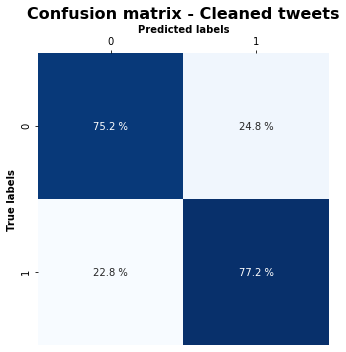

In [21]:
# Create classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Set variables
title = 'Confusion matrix - Cleaned tweets'

# Plot the figure
fig, ax0 = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='.1f', cbar=False, cmap='Blues')
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.ylabel('True labels', fontweight='bold')
plt.xlabel('Predicted labels', fontweight='bold')
plt.title(title, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# <font color=salmon>PART 5 - DETECT SENTIMENT WITH LEMMATIZED TWEETS</font>

In this part, we will use the **lemmatized tweets**.

NLTK library globaly changes plural to singular, but do not change am/was to root verb "be".

Besides, lemmatized tweets DO NOT contain common stopwords from NLTK tool.

## <font color=green>P5.1 - Process sentiment detection</font>

In [22]:
data = pd.DataFrame(columns=['text', 'label', 'prediction'])

# Process prediction
start = time()
for index, row in sample_df.iterrows():
    data = data.append({'text': row['text_lm'],
                        'label': row['sentiment'],
                        'prediction': sentiment_analysis(client, row['text_lm'])},
                       ignore_index=True)
pred_time = (time()-start)

# Display 5 first rows
data.head()

,text,label,prediction
0,sad gone week missing puppy tomorrow leave week,0,negative
1,sore throat,0,negative
2,extremely tired dosent want go school today,0,negative
3,user eh talking saab se estate get insurance not touch poppet,0,neutral
4,user thanks opinion dougie ha ha,0,positive


In [23]:
# Save to CSV file
data.to_csv(src_folder / 'p7_02_api_lemma_tweet.csv')

## <font color=green>P5.2 - Exclude neutral predictions</font>

In [24]:
# Filter on binary polarity (negative, positive)
data = data[data.prediction != 'neutral']

# Replace value of predictions columns
data['prediction'] = data['prediction'].replace(['negative', 'positive'],[0,1])

print('Nb rows: ', len(data))
print('Proportion vs Total sample: {}%'.format(len(data)/len(sample_df)*100))

# Display 5 first rows
data.head()

Nb rows:  682
Proportion vs Total sample: 68.2%


,text,label,prediction
0,sad gone week missing puppy tomorrow leave week,0,0
1,sore throat,0,0
2,extremely tired dosent want go school today,0,0
4,user thanks opinion dougie ha ha,0,1
5,user got little one cheese challenged make dinner difficult live cheese,0,0


## <font color=green>P5.3 - Evaluate predictions</font>

In [25]:
y_test = data.label.astype(int)
y_pred = data.prediction

# auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_score = auc(fpr, tpr)
# accuracy: (tp + tn) / (p + n)
acc = accuracy_score(y_test, y_pred)

# Append scores/results
model_results = model_results.append({'Model': 'Lemmatized tweets',
                                      'Predict_time':'{:0.1f}'.format(pred_time),
                                      'AUC_Score':'{:0.3f}%'.format(auc_score*100),
                                      'Accuracy':'{:0.3f}%'.format(acc*100)},
                                     ignore_index=True)
model_results

,Model,Predict_time,AUC_Score,Accuracy
0,Original tweets,212.5,71.081%,70.860%
1,Cleaned tweets,197.2,76.187%,76.148%
2,Lemmatized tweets,198.2,74.595%,74.633%


In [26]:
# Save to CSV file
model_results.to_csv(src_folder / 'p7_02_model_results.csv')

## <font color=green>P5.4 - Plot confusion matrix</font>

In [27]:
# Create confusion matrix table
# normalize='all', 'index' or 'columns'
cm = pd.crosstab(index=y_test,
                 columns=y_pred,
                 values=y_test,
                 aggfunc=lambda x:len(x), normalize='index').mul(100)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       360
           1       0.73      0.74      0.73       322

    accuracy                           0.75       682
   macro avg       0.75      0.75      0.75       682
weighted avg       0.75      0.75      0.75       682



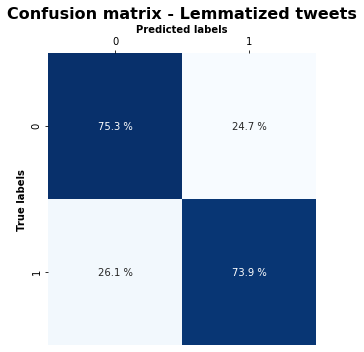

In [28]:
# Create classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Set variables
title = 'Confusion matrix - Lemmatized tweets'

# Plot the figure
fig, ax0 = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='.1f', cbar=False, cmap='Blues')
for t in ax.texts: t.set_text(t.get_text() + " %")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.ylabel('True labels', fontweight='bold')
plt.xlabel('Predicted labels', fontweight='bold')
plt.title(title, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# <font color=salmon>SUMMARY AND CONCLUSION</font>

Here are the final results!

In [29]:
# Load result
results = pd.read_csv(src_folder / 'p7_02_model_results.csv')
results

,Unnamed: 0,Model,Predict_time,AUC_Score,Accuracy
0,0,Original tweets,212.5,71.081%,70.860%
1,1,Cleaned tweets,197.2,76.187%,76.148%
2,2,Lemmatized tweets,198.2,74.595%,74.633%


We have applied the Microsoft Azure Sentiment API to our data, with different text states: not preprocessed at all, cleaned, fully preprocessed.

We have observed that in Version 3 of the API, the polarity of the sentiment comes with 3 labels: positive, negative, neutral. For consistency purpose, and to be able to compare apple to apple, we have excluded the neutral predictions. This leads a reduced size of sample around 65%. 

**Our best result comes from the cleaned tweets, with 76,19% AUC and Accuracy 76,15%**.

But one question could be raised: could a greater size of samples have led to better result ? Who knows...